In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station
# Create our session (link) from Python to the DB
session = Session(engine)


In [8]:
inspector = inspect(engine)


In [9]:
#inspect columns for each table (inspect added to import for this)
MCols = inspector.get_columns('Measurement')

for c in MCols:
    print (c['name'], c['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
SCols= inspector.get_columns('Station')

for c in SCols:
    print (c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.

engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23',)]

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
#I had errors with date column saying it was not in 'columns', I was not able to rename it either
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").all()
prcp = pd.DataFrame(precip).set_index(0)
prcp=prcp.rename(columns={0:'Date'})
prcp=prcp.rename(columns={1:'amount'})
prcp=prcp.sort_values(by=0).dropna()
prcp.head()



,amount
0,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


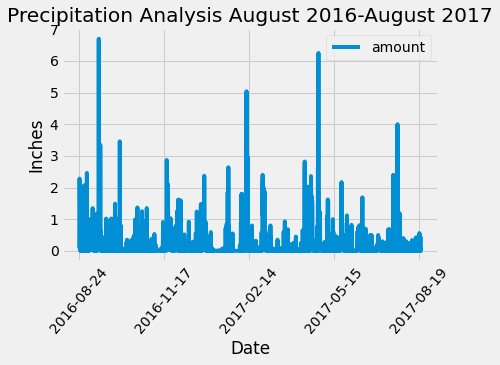

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp.plot(rot=50)
plt.title('Precipitation Analysis August 2016-August 2017')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.savefig("Resources/Precipitation analysis.png")
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp.describe()

,amount
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
TotalStations = session.query(Station).count()
print (TotalStations)

9


In [38]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
TopActive = session.query(Measurement.station, func.count(Measurement.station))\
              .group_by(Measurement.station)\
              .order_by(func.count(Measurement.station).desc()).limit(5).all()
MostActive=TopActive[0][0]
print(MostActive)
print(f'The most active station is {MostActive}')

USC00519281
The most active station is USC00519281


In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station==MostActive).all()
print(f'The most active station is station ID {MostActive} with a minimum temperature of 54.0, a maximum temperature of 85.0 and an average temperature of 71.66')

The most active station is station ID USC00519281 with a minimum temperature of 54.0, a maximum temperature of 85.0 and an average temperature of 71.66


In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
TempData12Mos = session.query(Measurement.tobs).filter(Measurement.station==MostActive).filter(Measurement.date>= "2016-08-23").all()
TempData1Year=pd.DataFrame(TempData12Mos, columns=['tobs'])
TempData1Year.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


<AxesSubplot:ylabel='Frequency'>

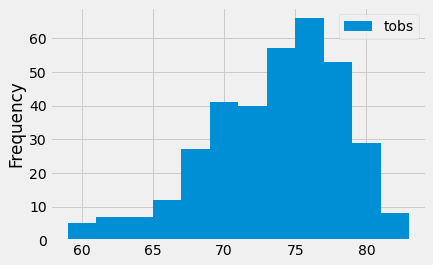

In [52]:
TempData1Year.plot(kind='hist', bins=12)

# Close session

In [53]:
# Close Session
session.close()